In [24]:
import os

In [25]:
os.getcwd()

'C:\\Users\\Dell'

In [26]:
os.chdir('C:\\Users\\Dell')

In [27]:
os.getcwd()

'C:\\Users\\Dell'

In [28]:
#Import Libraries/Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
card=pd.read_csv("Credit_Card.csv")

In [30]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
card.shape

(284807, 31)

In [32]:
card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
fraud=card[card["Class"]==1]

In [34]:
len(fraud)

492

In [35]:
Not_fraud=card[card["Class"]==0]

In [36]:
len(Not_fraud)

284315

In [37]:
fraud_indices=np.array(fraud.index)
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

EDA

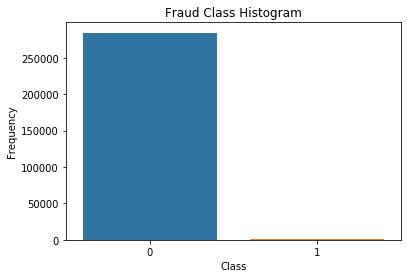

In [38]:
sns.countplot(x="Class",data=card)
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Predictive Analysis

In [51]:
import warnings
warnings.filterwarnings("ignore")

Step 1

In [39]:
X=card.drop(columns=["Class"])

In [40]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [41]:
y=card["Class"]

In [42]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Rules

In [44]:
X.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [48]:
type(X)

pandas.core.frame.DataFrame

In [49]:
X.shape

(284807, 30)

In [50]:
card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Step 2

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=4)

Feature Scaling on Training Dataset

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
SS=StandardScaler()

In [56]:
X_train_scaled=SS.fit_transform(X_train)

In [59]:
X_train_scaled=pd.DataFrame(X_train_scaled)

In [60]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.618823,-0.323768,1.985868,-2.538976,3.457613,-0.700154,-1.737681,-1.864545,0.986461,-2.665325,...,1.277833,0.989856,0.338220,0.256406,-1.991535,-1.087012,1.267051,2.480092,1.154409,-0.410478
1,0.134910,-3.868323,3.838720,-3.775602,3.831138,-4.222854,-0.008063,-5.237147,-1.574296,-4.173969,...,2.124171,-2.489977,3.092247,1.326162,0.697094,-0.362033,0.815340,-4.285582,-0.856387,-0.379735
2,0.205040,-1.336375,1.394801,-0.620499,1.291999,0.513032,0.084304,-0.729011,-1.655951,0.364342,...,-1.209053,2.995110,-2.261778,-0.249247,0.243529,0.907407,0.260011,0.350060,2.652198,-0.411444
3,-1.009672,0.465949,-0.495795,0.311184,-0.610365,-0.019945,-0.054651,0.231708,0.009340,1.173429,...,0.007996,-0.021558,-0.005207,-0.203871,-0.156265,0.695097,-1.335679,0.026614,0.056542,0.292098
4,0.077707,-3.226939,3.068067,-3.787073,2.601190,-3.852702,-0.982310,-4.672710,-1.214721,-2.832367,...,1.431109,-2.025299,1.895328,1.514854,0.689481,-2.231994,-2.163710,-3.475793,-0.742832,-0.410478


Feature Scaling on Testing Dataset

In [61]:
X_test_scaled=SS.transform(X_test)

In [62]:
X_test_scaled=pd.DataFrame(X_test_scaled)

In [63]:
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.072830,0.507108,-0.724235,0.678674,-0.414612,-0.382918,0.716423,-0.055517,0.056350,0.781438,...,0.149845,0.048542,0.855018,-0.162860,0.334621,0.635901,-0.067609,0.071904,0.027774,0.099191
1,-0.405460,0.576105,-0.183629,0.327489,-0.308427,0.367327,0.397844,0.291352,-0.050394,0.397140,...,-0.146592,-0.252570,-0.986910,-0.005914,-2.241299,0.532992,0.394803,-0.059576,-0.038571,-0.409311
2,0.827677,0.792833,-0.649971,0.138552,-1.029492,-0.063728,0.047262,0.046942,-0.087604,-0.544186,...,-0.398815,-0.130684,0.197122,0.224953,1.253103,-0.259355,-0.486401,-0.029226,-0.120630,-0.354143
3,0.408477,0.733069,-0.170652,0.038707,-0.195851,0.404546,-0.111910,0.303561,-0.110783,1.101932,...,-0.226207,-0.317796,-1.051620,0.318445,0.989785,-0.538580,0.180984,-0.158042,-0.106952,-0.374303
4,1.507102,0.507054,-0.763031,-0.316007,-0.148752,0.350083,-0.482672,0.688101,-0.248901,0.251701,...,0.696577,0.301766,0.848659,-0.673419,-0.480595,0.954273,0.102802,-0.286809,-0.044159,1.873336


Step 3 & Step 4 & Step 5

1st Technique

In [65]:
from sklearn.naive_bayes import GaussianNB

In [68]:
model1=GaussianNB()

In [69]:
model1.fit(X_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
model1.score(X_test_scaled,y_test)

0.9778729682438428

In [71]:
y_pred1=model1.predict(X_test_scaled)

In [80]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
print(confusion_matrix(y_test,y_pred1))

[[274379   6208]
 [     1     19]]


In [75]:
print(accuracy_score(y_test,y_pred1))

0.9778729682438428


In [76]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    280587
           1       0.00      0.95      0.01        20

    accuracy                           0.98    280607
   macro avg       0.50      0.96      0.50    280607
weighted avg       1.00      0.98      0.99    280607



In [78]:
confusion_matrix=pd.crosstab(y_test,y_pred1,rownames=["Actual"],colnames=["Predicted"])
confusion_matrix

Predicted,0,1
Actual,,
0,274379,6208
1,1,19


2nd Technique

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
model2=DecisionTreeClassifier()

In [83]:
model2.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
model2.score(X_test_scaled,y_test)

0.9662838061773227

In [85]:
y_pred2=model2.predict(X_test_scaled)

In [86]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [88]:
print(confusion_matrix(y_test,y_pred2))

[[271127   9460]
 [     1     19]]


In [89]:
print(accuracy_score(y_test,y_pred2))

0.9662838061773227


In [90]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    280587
           1       0.00      0.95      0.00        20

    accuracy                           0.97    280607
   macro avg       0.50      0.96      0.49    280607
weighted avg       1.00      0.97      0.98    280607



In [91]:
confusion_matrix=pd.crosstab(y_test,y_pred2,rownames=["Actual"],colnames=["Predicted"])
confusion_matrix

Predicted,0,1
Actual,,
0,271127,9460
1,1,19


3rd Technique (Majority Voting)

In [92]:
from sklearn.ensemble import VotingClassifier

In [93]:
model3=VotingClassifier(estimators=[('GNB',model1),("DTC",model2)],voting="hard")

In [94]:
model3.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('GNB',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('DTC',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                   

In [98]:
score3=model3.score(X_test_scaled,y_test)

In [99]:
score3

0.9949395417790718

In [96]:
y_pred3=model3.predict(X_test_scaled)

In [97]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
result=pd.DataFrame({"Model":["DTC + GNB"],"Score":score3})
result

,Model,Score
0,DTC + GNB,0.99494


4th Technique

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model4=RandomForestClassifier()

In [103]:
model4.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
model4.score(X_test_scaled,y_test)

0.9934891146692706

In [105]:
y_pred4=model4.predict(X_test_scaled)

In [106]:
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [108]:
print(confusion_matrix(y_test,y_pred4))

[[278761   1826]
 [     1     19]]


In [109]:
print(accuracy_score(y_test,y_pred4))

0.9934891146692706


In [110]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    280587
           1       0.01      0.95      0.02        20

    accuracy                           0.99    280607
   macro avg       0.51      0.97      0.51    280607
weighted avg       1.00      0.99      1.00    280607



In [111]:
confusion_matrix=pd.crosstab(y_test,y_pred4,rownames=["Actual"],colnames=["Predicted"])
confusion_matrix

Predicted,0,1
Actual,,
0,278761,1826
1,1,19


5th Technique

In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
model5=AdaBoostClassifier()

In [114]:
model5.fit(X_train_scaled,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [115]:
model5.score(X_test_scaled,y_test)

0.985014629000702

In [116]:
y_pred5=model5.predict(X_test_scaled)

In [117]:
y_pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [119]:
print(confusion_matrix(y_test,y_pred5))

[[276383   4204]
 [     1     19]]


In [120]:
print(accuracy_score(y_test,y_pred5))

0.985014629000702


In [121]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    280587
           1       0.00      0.95      0.01        20

    accuracy                           0.99    280607
   macro avg       0.50      0.97      0.50    280607
weighted avg       1.00      0.99      0.99    280607



In [123]:
confusion_matrix=pd.crosstab(y_test,y_pred5,rownames=["Actual"],colnames=["Predicted"])
confusion_matrix

Predicted,0,1
Actual,,
0,276383,4204
1,1,19
